Import modules.

In [111]:
import numpy as np
import matplotlib.pyplot as plt


Define Sphere optimization function.

In [112]:
def sphere(x):
    return sum(x**2)

Problem definition.

In [124]:
problem = {}
problem["costfunc"] = sphere
problem["nvar"] = 5
problem["varmin"] = -10
problem["varmax"] = 10

GA parameters.

In [103]:
params = {}
params["maxit"] = 100
params["npop"] = 20
params["pc"] = 1
params["gamma"] = 0.1
params["mu"] = 0.2
params["sigma"] = 0.1
params["beta"] = 1

Definition of crossover function.

In [104]:
def crossover(p1, p2, gamma = 0.1):
    c1 = dict.copy(p1)
    c2 = dict.copy(p2)
    
    alpha = np.random.uniform(-gamma, 1 + gamma, *c1["position"].shape)
    c1["position"] = alpha * p1["position"] + (1 - alpha) * p2["position"]
    c2["position"] = alpha * p2["position"] + (1 - alpha) * p1["position"]
    
    return c1, c2

Define mutation function.

In [105]:
def mutate(x, mutationRate, sigma):
    y = dict.copy(x)
    flag = (np.random.rand(*x["position"].shape) <= mutationRate)
    ind = np.argwhere(flag)
    y["position"][ind] += sigma * np.random.rand(*ind.shape)
    
    return y

Apply bounds to features.

In [106]:
def applyBounds(x, varmin, varmax):
    x["position"] = np.maximum(x["position"], varmin)
    x["position"] = np.minimum(x["position"], varmax)

Roulete wheel selection.

In [107]:
def rouletteWheelSelection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    
    return ind[0][0]

GA algorithm.

In [127]:
def run(problem, params):
    
    # Problem information here
    costFunction = problem["costfunc"]
    nvar = problem["nvar"]
    varmin = problem["varmin"]
    varmax = problem["varmax"]
    
    # Parameters
    maxit = params["maxit"]
    npop = params["npop"]
    pc = params["pc"]
    gamma = params["gamma"]
    nc = np.round(pc * npop / 2) * 2
    mu = params["mu"]
    sigma = params["sigma"]
    beta = params["beta"]
    
    
    # Best solution
    bestSolution = {
        "position": None,
        "cost": np.inf
    }
    
    # Initialize population
    pop = []
    for i in range(npop):
        # Empty Individual Template
        empty_individual = {}

        empty_individual["position"] = None
        empty_individual["cost"] = None
        
        pop.append(empty_individual)

    for ind in pop:
        ind["position"] = np.random.uniform(varmin, varmax, nvar)
        ind["cost"] = costFunction(ind["position"])
        
        if ind["cost"] < bestSolution["cost"]:
            bestSolution = dict.copy(ind)
            
    # Best cost of interations
    betsCost = np.empty(maxit)
    
    # Array of best costs
    bestcost = []
    
    # Main loop
    for it in range(maxit):
        costs = np.array([x["cost"] for x in pop])
        avgCost = np.mean(costs)
        
        if (avgCost != 0):
            costs = costs/avgCost
            
        probs = np.exp(-beta * costs)
        popc = []
        
        for k in range(int(nc//2)):
            # Select parents
            q = np.random.permutation(npop)
            
            p1 = pop[q[0]]
            p2 = pop[q[1]]
            
            # Roulete Wheel selection
            p1 = pop[rouletteWheelSelection(probs)]
            p2 = pop[rouletteWheelSelection(probs)]
            
            # Perform crossover
            c1, c2 = crossover(p1, p2, gamma)
            
            # Perform mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)
            
            # Apply bounds
            applyBounds(c1, varmin, varmax)
            applyBounds(c2, varmin, varmax)
            
            # Evaluate first offspring
            c1["cost"] = costFunction(c1["position"])
            
            if(c1["cost"] < bestSolution["cost"]):
                bestSolution = dict.copy(c1)
                
            # Evaluate first offspring
            c2["cost"] = costFunction(c2["position"])
            
            if(c2["cost"] < bestSolution["cost"]):
                bestSolution = dict.copy(c2)
                
            # Add offsprings to popc
            popc.append(c1)
            popc.append(c2)
            
        # Merge, sort and select
        pop += popc
        pop = sorted(pop, key = lambda x: x["cost"])
        pop = pop[0:npop]

        # Store best cost
        bestcost.append(bestSolution["cost"])

        # Show iteration information
        print("Iteration {}: Best Cost = {}".format(it, bestSolution["cost"]))
            
    out = {}
    out["pop"] = pop
    out["bestsol"] = bestSolution
    out["bestcost"] = bestcost

    return out  

Run GA.

In [128]:
out = run(problem, params)

Iteration 0: Best Cost = 43.96380638590959
Iteration 1: Best Cost = 20.60785396223472
Iteration 2: Best Cost = 12.494781196713085
Iteration 3: Best Cost = 5.90918713601058
Iteration 4: Best Cost = 5.809417710939544
Iteration 5: Best Cost = 3.616374527141649
Iteration 6: Best Cost = 3.616374527141649
Iteration 7: Best Cost = 1.3633716011692445
Iteration 8: Best Cost = 0.5230199062372747
Iteration 9: Best Cost = 0.4385857655011178
Iteration 10: Best Cost = 0.2747194578091393
Iteration 11: Best Cost = 0.24739377083802516
Iteration 12: Best Cost = 0.19775141459036422
Iteration 13: Best Cost = 0.16134031070143118
Iteration 14: Best Cost = 0.12575664349939597
Iteration 15: Best Cost = 0.06377712503260374
Iteration 16: Best Cost = 0.06377712503260374
Iteration 17: Best Cost = 0.06377712503260374
Iteration 18: Best Cost = 0.05834911617459832
Iteration 19: Best Cost = 0.05308239756450354
Iteration 20: Best Cost = 0.03260819275175779
Iteration 21: Best Cost = 0.02988962667316699
Iteration 22: Be

Results.

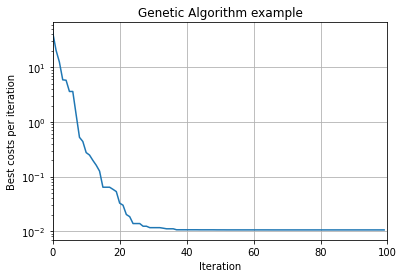

In [129]:
plt.semilogy(out["bestcost"])
plt.xlim(0, params["maxit"])
plt.xlabel("Iteration")
plt.ylabel("Best costs per iteration")
plt.title("Genetic Algorithm example")
plt.grid(True)